# AI 201 Mini Project - Predicting Prediabetes/Diabetes from Patient Health Indicators
## Neil John Catapang

### Classification using the Undersampled Dataset

#### Artificial Neural Network (ANN)

Number of features: 21

Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Class distribution:
Training set: Counter({1: 28277, 0: 28276})
Test set: Counter({0: 7070, 1: 7069})


c:\Users\Neil Catapang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
707/707 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6761 - loss: 0.6339 - precision: 0.6655 - recall: 0.7253 - val_accuracy: 0.7487 - val_loss: 0.5420 - val_precision: 0.7269 - val_recall: 0.7966 - learning_rate: 0.0010
Epoch 2/1000
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7465 - loss: 0.5386 - precision: 0.7255 - recall: 0.7974 - val_accuracy: 0.7498 - val_loss: 0.5306 - val_precision: 0.7347 - val_recall: 0.7817 - learning_rate: 0.0010
Epoch 3/1000
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7502 - loss: 0.5293 - precision: 0.7269 - recall: 0.8068 - val_accuracy: 0.7522 - val_loss: 0.5225 - val_precision: 0.7320 - val_recall: 0.7953 - learning_rate: 0.0010
Epoch 4/1000
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7494 - loss: 0.5227 - precision: 0.7255 - recall: 0.8037 - val_accuracy: 0.7527 - val_loss: 0.5184 - val_precision: 0.7320 - val_recall: 0.7971 - learning_rate: 0.0010
Epoch 5/1000
707/707 ━━━━━━━━━━━━━━━━━━━━ 1s 708us

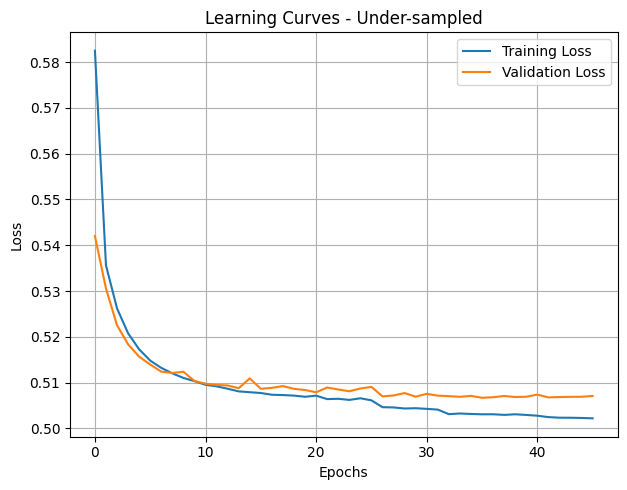

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step

Predictions distribution: Counter({1: 7836, 0: 6303})
True distribution: Counter({0: 7070, 1: 7069})

Confusion Matrix:
[[4918 2152]
 [1385 5684]]
Specificity: 0.6956152758132956


In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter

# Read dataset
data = pd.read_csv('diabetes_binary.csv')
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Dataset shape and info
print(f"Number of features: {X.shape[1]}")
print("\nFeature names:")
print(X.columns.tolist())

# Undersampling the dataset to balance classes
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Label encoding (binary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_under)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale features (some features are non-binary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check class distribution
print("\nClass distribution:")
print("Training set:", Counter(y_train))
print("Test set:", Counter(y_test))


# Artificial neural network -----------------------------------------------------
# Choose leakyReLU as activation function for hidden layers
leaky = LeakyReLU(negative_slope=0.01)

# Build model (2H + 1O) MLP
model = Sequential([
    # First hidden layer
    Dense(16, input_dim=X_train_scaled.shape[1], 
          kernel_regularizer=l2(0.001), 
          activation=leaky),
    
    # Second hidden layer
    Dense(16, 
          kernel_regularizer=l2(0.001),
          activation=leaky),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Check the model summary
model.summary()

# Compile (use Adam as optimizer)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Add callbacks (early stopping, learning rate decay)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001,
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"\nTest Metrics:")
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Learning curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves - Under-sampled')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict the test set
score_ANN_under = model.predict(X_test_scaled).flatten()
y_pred = (score_ANN_under > 0.5).astype(int)  # Convert to classes 0 or 1

print("\nPredictions distribution:", Counter(y_pred))
print("True distribution:", Counter(y_test))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f'Specificity: {cm[0, 0]/(cm[0, 0] + cm[0, 1])}')

# For plotting of ROC
fpr_ANN_under, tpr_ANN_under, thresholds_ANN_under = roc_curve(y_test, score_ANN_under)
roc_auc_ANN_under = auc(fpr_ANN_under, tpr_ANN_under)


In [2]:
model.save('ANN_keras_proj.keras')

#### Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# Initialize random forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# GridSearchCV for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

# Show best parameters
print("Best Parameters:", grid.best_params_)

# Prediction and evaluation of model on test set
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Sensitivity:", cm[1, 1]/(cm[1, 0] + cm[1, 1]))
print("Specificity:", cm[0, 0]/(cm[0, 0] + cm[0, 1]))
print(cm)

# For plotting of ROC
score_RF_under = best_rf.predict_proba(X_test)[:, 1]
fpr_RF_under, tpr_RF_under, thresholds_RF_under = roc_curve(y_test, score_RF_under)
roc_auc_RF_under = auc(fpr_RF_under, tpr_RF_under)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      7070
           1       0.72      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139

Sensitivity: 0.7961522138916396
Specificity: 0.6944837340876945
[[4910 2160]
 [1441 5628]]


#### XGBoost

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')

# Tuning of hyperparameters via GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


# Final evaluation on the test set
y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Sensitivity:", cm[1, 1]/(cm[1, 0] + cm[1, 1]))
print("Specificity:", cm[0, 0]/(cm[0, 0] + cm[0, 1]))
print(cm)

# For plotting of ROC
score_XG_under = best_model.predict_proba(X_test_scaled)[:, 1]
fpr_XG_under, tpr_XG_under, thresholds_XG_under = roc_curve(y_test, score_XG_under)
roc_auc_XG_under = auc(fpr_XG_under, tpr_XG_under)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      7070
           1       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Sensitivity: 0.7996887820059414
Specificity: 0.7002828854314003
[[4951 2119]
 [1416 5653]]


### Classification using the Oversampled Dataset (SMOTE)

#### Artificial Neural Network (ANN)

Number of features: 21

Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Class distribution:
Training set: Counter({1: 174667, 0: 174667})
Test set: Counter({0: 43667, 1: 43667})


c:\Users\Neil Catapang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
4367/4367 ━━━━━━━━━━━━━━━━━━━━ 4s 821us/step - accuracy: 0.7360 - loss: 0.5268 - precision: 0.7283 - recall: 0.7391 - val_accuracy: 0.7776 - val_loss: 0.4683 - val_precision: 0.7550 - val_recall: 0.8227 - learning_rate: 0.0010
Epoch 2/1000
4367/4367 ━━━━━━━━━━━━━━━━━━━━ 3s 756us/step - accuracy: 0.7822 - loss: 0.4594 - precision: 0.7651 - recall: 0.8148 - val_accuracy: 0.8003 - val_loss: 0.4244 - val_precision: 0.7834 - val_recall: 0.8308 - learning_rate: 0.0010
Epoch 3/1000
4367/4367 ━━━━━━━━━━━━━━━━━━━━ 3s 775us/step - accuracy: 0.8032 - loss: 0.4187 - precision: 0.7958 - recall: 0.8154 - val_accuracy: 0.8123 - val_loss: 0.3958 - val_precision: 0.8163 - val_recall: 0.8066 - learning_rate: 0.0010
Epoch 4/1000
4367/4367 ━━━━━━━━━━━━━━━━━━━━ 3s 764us/step - accuracy: 0.8165 - loss: 0.3941 - precision: 0.8160 - recall: 0.8167 - val_accuracy: 0.8230 - val_loss: 0.3781 - val_precision: 0.8187 - val_recall: 0.8303 - learning_rate: 0.0010
Epoch 5/1000
4367/4367 ━━━━━━━━━━━━━━━━━

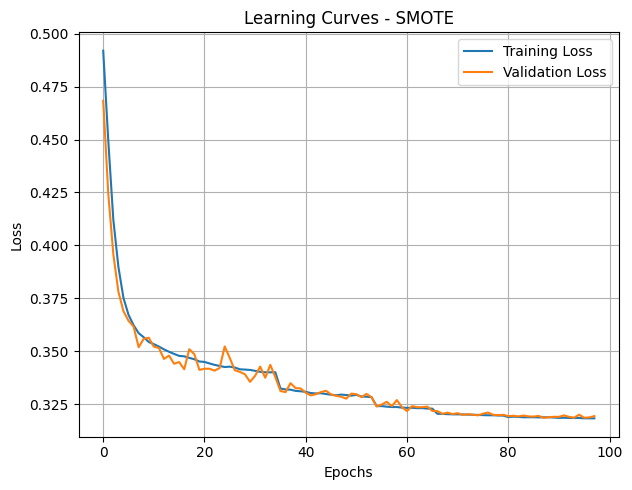

2730/2730 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step

Predictions distribution: Counter({0: 46827, 1: 40507})
True distribution: Counter({0: 43667, 1: 43667})

Confusion Matrix:
[[38654  5013]
 [ 8173 35494]]
Specificity: 0.8851993496232853


In [5]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# Read dataset
data = pd.read_csv('diabetes_binary.csv')
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Dataset shape and info
print(f"Number of features: {X.shape[1]}")
print("\nFeature names:")
print(X.columns.tolist())

# Oversampling the dataset to balance classes
oversample = SMOTE(random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

# Label encoding (binary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_over)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale features (some features are non-binary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check class distribution
print("\nClass distribution:")
print("Training set:", Counter(y_train))
print("Test set:", Counter(y_test))


# -----------------------------------------------------
# Choose leakyReLU as activation function for hidden layers
leaky = LeakyReLU(negative_slope=0.01)

# Build model (2H + 1O) MLP
model = Sequential([
    # First hidden layer
    Dense(16, input_dim=X_train_scaled.shape[1],
          kernel_regularizer=l2(0.0001),
          activation=leaky),
    
    # Second hidden layer
    Dense(16,
          kernel_regularizer=l2(0.0001),
          activation=leaky),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Check the model summary
model.summary()

# Compile (use Adam as optimizer)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Add callbacks (early stopping, learning rate decay)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001,
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"\nTest Metrics:")
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Learning curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves - SMOTE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict the test set
score_ANN_smote = model.predict(X_test_scaled).flatten()
y_pred = (score_ANN_smote > 0.5).astype(int)  # Convert probabilities to binary predictions

print("\nPredictions distribution:", Counter(y_pred))
print("True distribution:", Counter(y_test))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f'Specificity: {cm[0, 0]/(cm[0, 0] + cm[0, 1])}')

# For plotting of ROC
fpr_ANN_smote, tpr_ANN_smote, thresholds_ANN_smote = roc_curve(y_test, score_ANN_smote)
roc_auc_ANN_smote = auc(fpr_ANN_smote, tpr_ANN_smote)


In [6]:
model.save('ANN_keras_proj_smote.keras')

#### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize random forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# GridSearchCV for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Prediction and evaluation of the model on test set
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Sensitivity:", cm[1, 1]/(cm[1, 0] + cm[1, 1]))
print("Specificity:", cm[0, 0]/(cm[0, 0] + cm[0, 1]))
print(cm)

# For plotting of ROC curve
score_RF_smote = best_rf.predict_proba(X_test)[:, 1]
fpr_RF_smote, tpr_RF_smote, thresholds_RF_smote = roc_curve(y_test, score_RF_smote)
roc_auc_RF_smote = auc(fpr_RF_smote, tpr_RF_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.9218059404126686

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     43667
           1       0.96      0.88      0.92     43667

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334

Sensitivity: 0.87968030778391
Specificity: 0.9639315730414272
[[42092  1575]
 [ 5254 38413]]


#### XGBoost

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss')

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Show best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


# Model evaluation on the test set
y_test_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_test_pred)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Sensitivity:", cm[1, 1]/(cm[1, 0] + cm[1, 1]))
print("Specificity:", cm[0, 0]/(cm[0, 0] + cm[0, 1]))
print(cm)

# FOr plotting of ROC curve
score_XG_smote = best_model.predict_proba(X_test_scaled)[:, 1]
fpr_XG_smote, tpr_XG_smote, thresholds_XG_smote = roc_curve(y_test, score_XG_smote)
roc_auc_XG_smote = auc(fpr_XG_smote, tpr_XG_smote)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Test Accuracy: 0.9181418462454485

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.97      0.86      0.91     43667

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334

Sensitivity: 0.8617033457759864
Specificity: 0.9745803467149106
[[42557  1110]
 [ 6039 37628]]


### Getting the Most Important Features Using Feature Importance

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Read dataset
data = pd.read_csv('diabetes_binary.csv')
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']
feature_names = X.columns

# Dataset shape and info
print(f"Number of features: {X.shape[1]}")
print("\nFeature names:")
print(X.columns.tolist())

# Undersampling the dataset to balance classes
# Oversampled data was avoided to eliminate the potential effects of synthetic data on feature importance
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

# Label encoding (binary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_under)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# Feature importance
clf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Built-in feature importance (Gini Importance or Mean Decrease in Impurity)
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)


Number of features: 21

Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
                 Feature  Gini Importance
13               GenHlth         0.227718
0                 HighBP         0.216948
3                    BMI         0.136433
18                   Age         0.096898
1               HighChol         0.089562
16              DiffWalk         0.048359
20                Income         0.034481
15              PhysHlth         0.029929
6   HeartDiseaseorAttack         0.027147
19             Education         0.016537
14              MentHlth         0.013428
7           PhysActivity         0.010078
10     HvyAlcoholConsump         0.009836
17                   Sex         0.008822
2              CholCheck         0.007471
5                 Stroke    

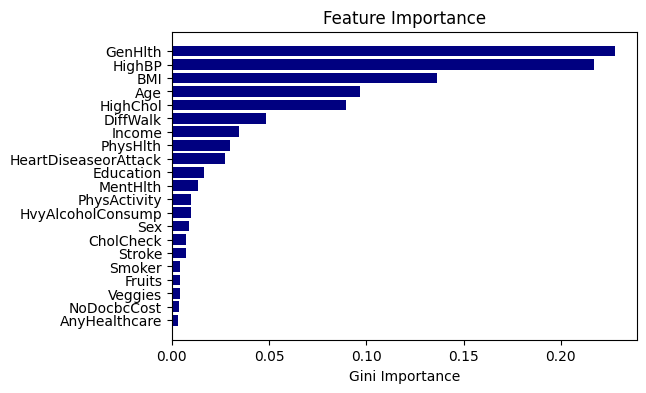

In [10]:
plt.figure(figsize=(6, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='#000080')
plt.xlabel('Gini Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

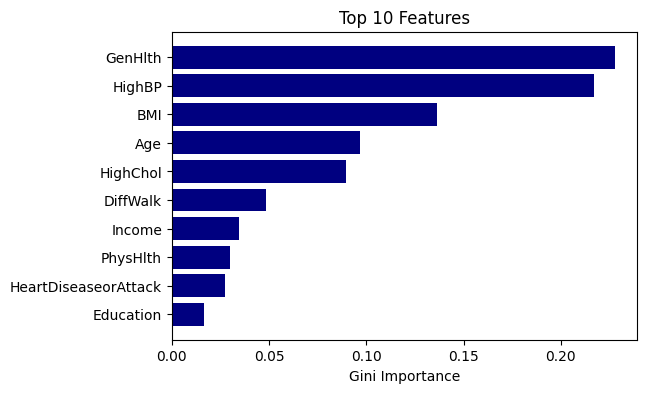

In [11]:
# Top 10 features only
plt.figure(figsize=(6, 4))
plt.barh(feature_imp_df['Feature'][:10], feature_imp_df['Gini Importance'][:10], color='#000080')
plt.xlabel('Gini Importance')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()
plt.show()

### Plotting of ROC Curves

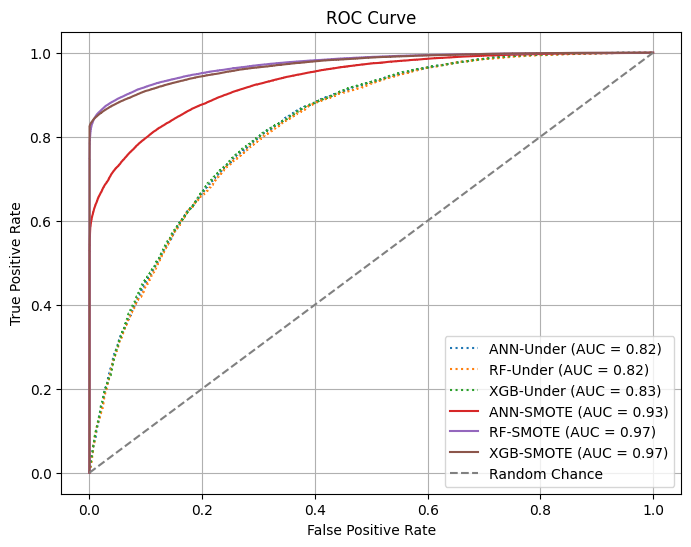

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_ANN_under, tpr_ANN_under, linestyle='dotted', label=f'ANN-Under (AUC = {roc_auc_ANN_under:.2f})')
plt.plot(fpr_RF_under, tpr_RF_under, linestyle='dotted', label=f'RF-Under (AUC = {roc_auc_RF_under:.2f})')
plt.plot(fpr_XG_under, tpr_XG_under, linestyle='dotted', label=f'XGB-Under (AUC = {roc_auc_XG_under:.2f})')
plt.plot(fpr_ANN_smote, tpr_ANN_smote, label=f'ANN-SMOTE (AUC = {roc_auc_ANN_smote:.2f})')
plt.plot(fpr_RF_smote, tpr_RF_smote, label=f'RF-SMOTE (AUC = {roc_auc_RF_smote:.2f})')
plt.plot(fpr_XG_smote, tpr_XG_smote, label=f'XGB-SMOTE (AUC = {roc_auc_XG_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()